In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py


In [27]:
test_chunks = pd.read_csv('../data/whole_genome/test_chunks.csv')
test_chunks = test_chunks.iloc[:1000].reset_index()
test_chunks

,index,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,Gene name,Gene Type,Test_set,CV0,CV1,CV2,CV3,CV4,chunks,ChunkStart,ChunkEnd,AdjustedEnd,FlankStart,FlankEnd
0,0,ENSG00000163352,1,154993586,154994315,1,LENEP,protein_coding,True,False,False,False,False,False,"(154993586, 154994315)",154993586,154994315,154998585,154988586,155003585
1,1,ENSG00000203667,1,244835322,244845057,1,COX20,protein_coding,True,False,False,False,False,False,"(244835322, 244840321)",244835322,244840321,244840321,244830322,244845321
2,2,ENSG00000203667,1,244835322,244845057,1,COX20,protein_coding,True,False,False,False,False,False,"(244840322, 244845057)",244840322,244845057,244845321,244835322,244850321
3,3,ENSG00000173627,1,183646404,183653316,-1,APOBEC4,protein_coding,True,False,False,False,False,False,"(183646404, 183651403)",183646404,183651403,183651403,183641404,183656403
4,4,ENSG00000173627,1,183646404,183653316,-1,APOBEC4,protein_coding,True,False,False,False,False,False,"(183651404, 183653316)",183651404,183653316,183656403,183646404,183661403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,False,False,False,False,"(225186262, 225191261)",225186262,225191261,225191261,225181262,225196261
996,996,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,False,False,False,False,"(225191262, 225196261)",225191262,225196261,225196261,225186262,225201261
997,997,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,False,False,False,False,"(225196262, 225201261)",225196262,225201261,225201261,225191262,225206261
998,998,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,False,False,False,False,"(225201262, 225206261)",225201262,225206261,225206261,225196262,225211261


In [21]:
ss_5_sites = pd.read_csv('../data/whole_genome/test_chunks_1k_5ss.bed', sep='\t', 
                         names=['chromosome','start','end','chromosome_again','ss_pos','ss_pos_again','ts','na','strand','na2'])
ss_5_sites

,chromosome,start,end,chromosome_again,ss_pos,ss_pos_again,ts,na,strand,na2
0,chr1,154993586,154994315,chr1,154993793,154993793,ENST00000368427.3_cds_0_0_chr1_154993608_f,0,+,0
1,chr1,154993586,154994315,chr1,154993793,154993793,ENST00000392487.2_cds_0_0_chr1_154993608_f,0,+,0
2,chr1,244835322,244840321,chr1,244835756,244835756,ENST00000366528.3_cds_0_0_chr1_244835715_f,0,+,0
3,chr1,244835322,244840321,chr1,244836520,244836520,ENST00000366528.3_cds_1_0_chr1_244836485_f,0,+,0
4,chr1,244835322,244840321,chr1,244835756,244835756,ENST00000411948.7_cds_0_0_chr1_244835715_f,0,+,0
...,...,...,...,...,...,...,...,...,...,...
3855,chr1,225201262,225206261,chr1,225206179,225206179,ENST00000439375.6_cds_37_0_chr1_225205971_f,0,+,0
3856,chr1,225206262,225211261,chr1,225207220,225207220,ENST00000445597.6_cds_27_0_chr1_225206968_f,0,+,0
3857,chr1,225206262,225211261,chr1,225207220,225207220,ENST00000430092.5_cds_39_0_chr1_225206968_f,0,+,0
3858,chr1,225206262,225211261,chr1,225207220,225207220,ENST00000682510.1_cds_40_0_chr1_225206968_f,0,+,0


In [24]:
ss_5_sites['chromosome'] = ss_5_sites['chromosome'].str[3:].astype(int)


,chromosome,start,end,chromosome_again,ss_pos,ss_pos_again,ts,na,strand,na2
0,1,154993586,154994315,chr1,154993793,154993793,ENST00000368427.3_cds_0_0_chr1_154993608_f,0,+,0
1,1,154993586,154994315,chr1,154993793,154993793,ENST00000392487.2_cds_0_0_chr1_154993608_f,0,+,0
2,1,244835322,244840321,chr1,244835756,244835756,ENST00000366528.3_cds_0_0_chr1_244835715_f,0,+,0
3,1,244835322,244840321,chr1,244836520,244836520,ENST00000366528.3_cds_1_0_chr1_244836485_f,0,+,0
4,1,244835322,244840321,chr1,244835756,244835756,ENST00000411948.7_cds_0_0_chr1_244835715_f,0,+,0
...,...,...,...,...,...,...,...,...,...,...
3855,1,225201262,225206261,chr1,225206179,225206179,ENST00000439375.6_cds_37_0_chr1_225205971_f,0,+,0
3856,1,225206262,225211261,chr1,225207220,225207220,ENST00000445597.6_cds_27_0_chr1_225206968_f,0,+,0
3857,1,225206262,225211261,chr1,225207220,225207220,ENST00000430092.5_cds_39_0_chr1_225206968_f,0,+,0
3858,1,225206262,225211261,chr1,225207220,225207220,ENST00000682510.1_cds_40_0_chr1_225206968_f,0,+,0


In [30]:
targets = pd.merge(left=test_chunks, right=ss_5_sites, 
                   left_on=['Chromosome/scaffold name', 'ChunkStart'], 
                   right_on=['chromosome','start'])
targets['ss_pos'] = targets['ss_pos']-targets['start']
targets

,index,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Strand,Gene name,Gene Type,Test_set,CV0,...,chromosome,start,end,chromosome_again,ss_pos,ss_pos_again,ts,na,strand,na2
0,0,ENSG00000163352,1,154993586,154994315,1,LENEP,protein_coding,True,False,...,1,154993586,154994315,chr1,207,154993793,ENST00000368427.3_cds_0_0_chr1_154993608_f,0,+,0
1,0,ENSG00000163352,1,154993586,154994315,1,LENEP,protein_coding,True,False,...,1,154993586,154994315,chr1,207,154993793,ENST00000392487.2_cds_0_0_chr1_154993608_f,0,+,0
2,1,ENSG00000203667,1,244835322,244845057,1,COX20,protein_coding,True,False,...,1,244835322,244840321,chr1,434,244835756,ENST00000366528.3_cds_0_0_chr1_244835715_f,0,+,0
3,1,ENSG00000203667,1,244835322,244845057,1,COX20,protein_coding,True,False,...,1,244835322,244840321,chr1,1198,244836520,ENST00000366528.3_cds_1_0_chr1_244836485_f,0,+,0
4,1,ENSG00000203667,1,244835322,244845057,1,COX20,protein_coding,True,False,...,1,244835322,244840321,chr1,434,244835756,ENST00000411948.7_cds_0_0_chr1_244835715_f,0,+,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,998,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,...,1,225201262,225206261,chr1,4917,225206179,ENST00000439375.6_cds_37_0_chr1_225205971_f,0,+,0
3856,999,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,...,1,225206262,225211261,chr1,958,225207220,ENST00000445597.6_cds_27_0_chr1_225206968_f,0,+,0
3857,999,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,...,1,225206262,225211261,chr1,958,225207220,ENST00000430092.5_cds_39_0_chr1_225206968_f,0,+,0
3858,999,ENSG00000185842,1,224896262,225399292,1,DNAH14,protein_coding,True,False,...,1,225206262,225211261,chr1,958,225207220,ENST00000682510.1_cds_40_0_chr1_225206968_f,0,+,0


In [32]:
targets[['index','ss_pos']].drop_duplicates()

,index,ss_pos
0,0,207
2,1,434
3,1,1198
5,2,1736
6,2,1936
...,...,...
3843,996,1649
3847,997,-225196263
3848,998,3011
3849,998,4917


In [79]:
targets[['index','ss_pos']].drop_duplicates().sample(10)

,index,ss_pos
3601,934,1330
3069,769,243
2361,535,-32610173
2945,754,3189
747,204,-116274992
332,108,428
1850,398,-101503172
9,2,2854
3005,762,2626
1878,417,-173116353


In [4]:
def plot_some_splice_site(activations, chunks, targets):
    
    for chunk, target in zip(chunks, targets):
        plt.imshow(activations[chunk,target-100:target+100,-25:], aspect='auto', interpolation='none')
        ax = plt.gca()
        yticks = ax.get_yticks()

        # Create new labels by subtracting 100
        new_labels = [int(y - 100) for y in yticks[1:]]

        # Set the new labels while keeping the same tick positions
        ax.set_yticks(yticks[1:])
        ax.set_yticklabels(new_labels)
        plt.xlabel('features')
        plt.ylabel(f"Positions relative to 5'ss {chunk} {target}")
        plt.show()
    
def feature_gazing(pred_file):
    path = '/grid/hackathon/data_norepl/splarseers/output/'
    with h5py.File(path+pred_file,'r') as f:
        activations = f['activations'][:]
    activations = activations[:,:,np.argsort(((activations>0).sum(axis=0).sum(axis=0)))]
    
    sns.histplot((activations>0).sum(axis=0).sum(axis=0)/(5000*1000), bins=100)
    plt.xlabel('Feature activation probability')
    plt.title(pred_file)
    plt.show()
    
    plot_some_splice_site(activations, [0,2,2,998,934,769,754,108,2,762], [207,1736,1936,3011,1330,243,3189,428,2854,2626])
    return(activations)
        

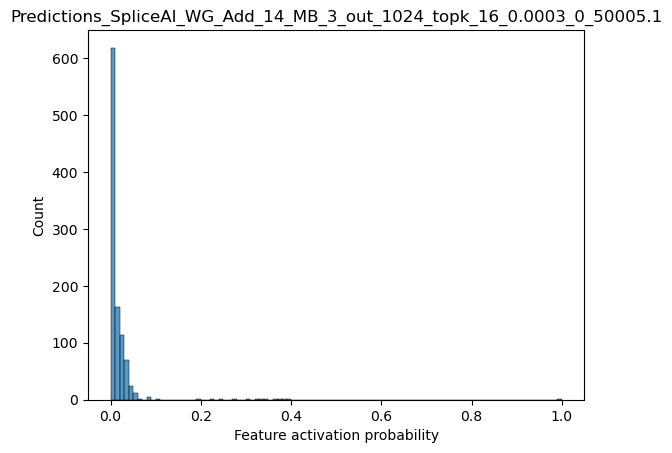

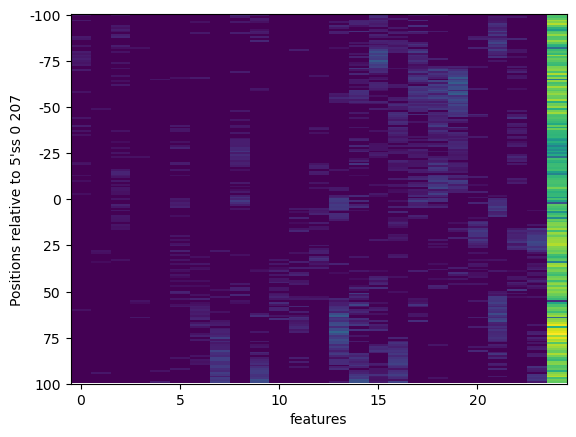

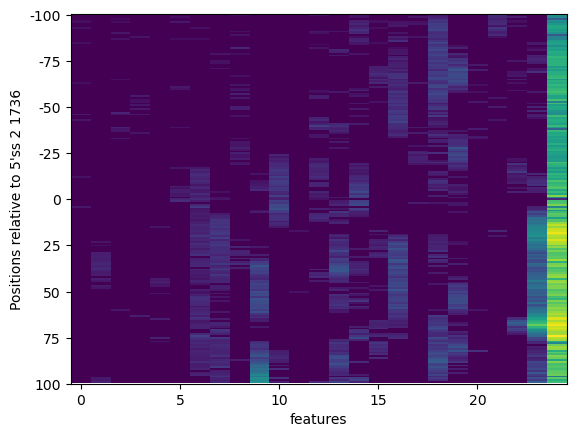

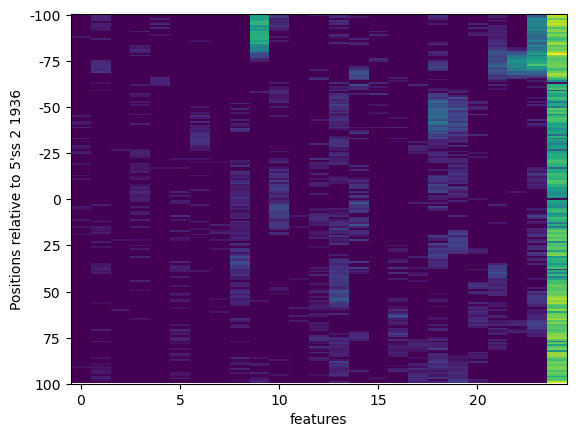

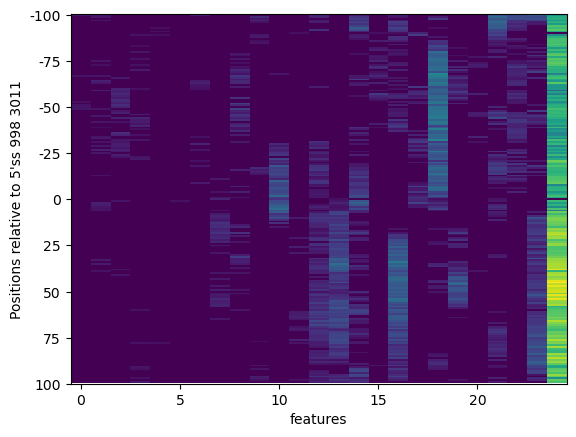

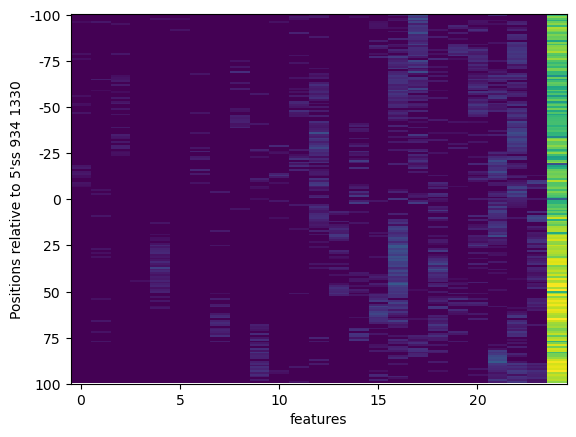

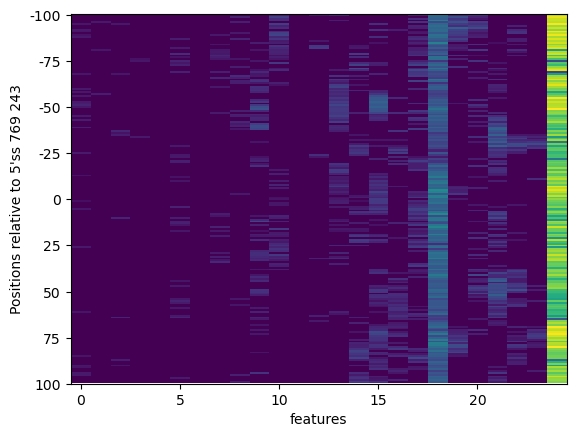

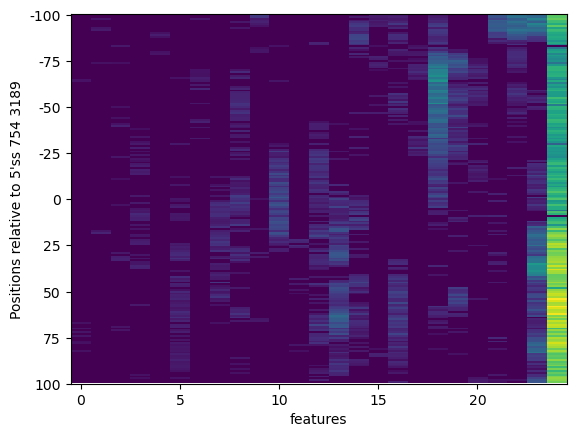

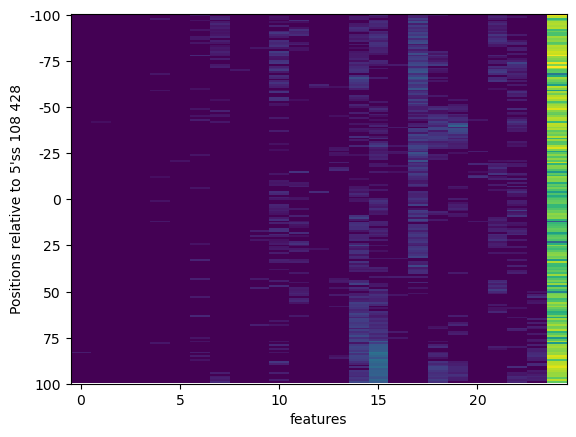

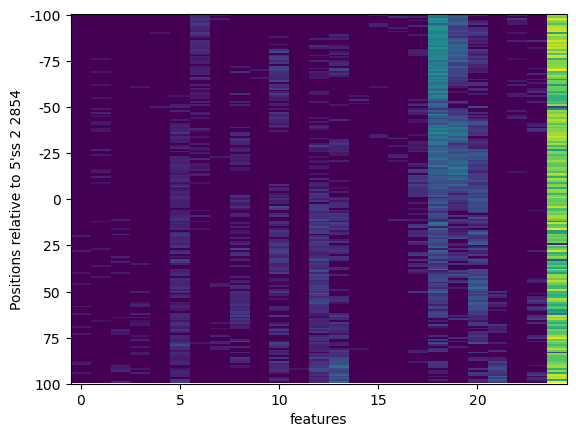

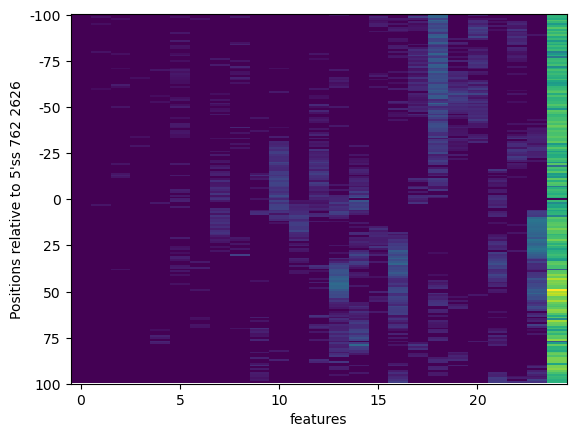

In [5]:
topk16_activations = feature_gazing('Predictions_SpliceAI_WG_Add_14_MB_3_out_1024_topk_16_0.0003_0_50005.1')

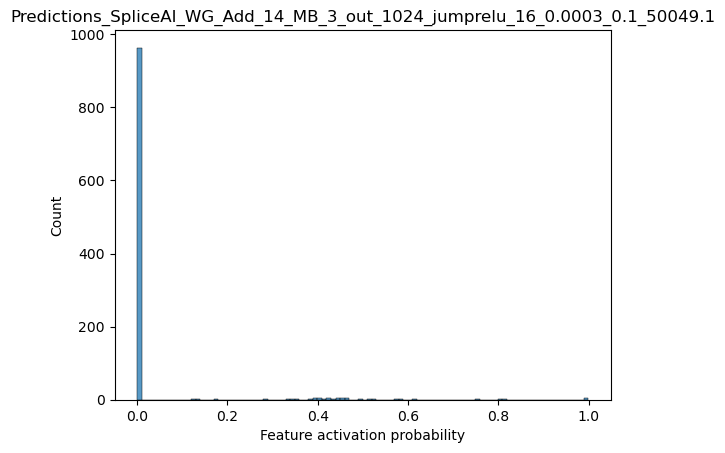

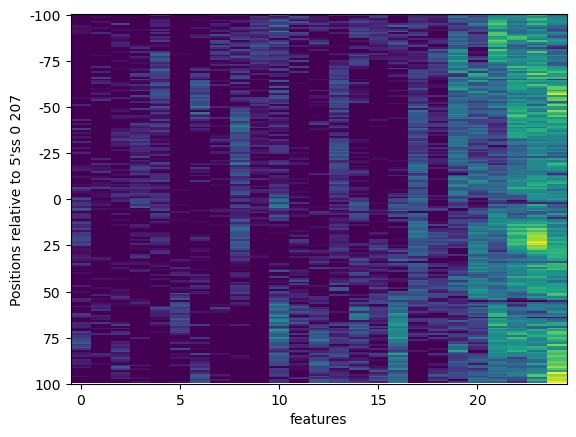

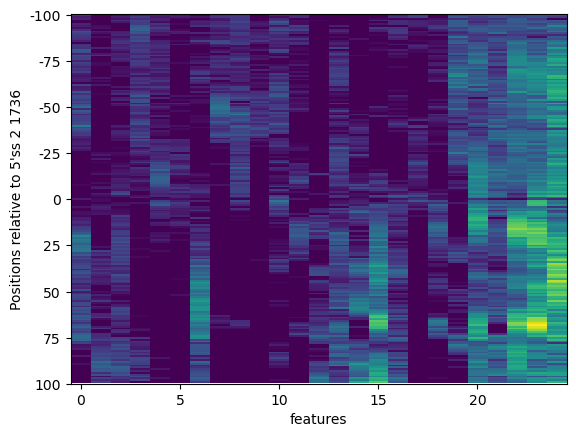

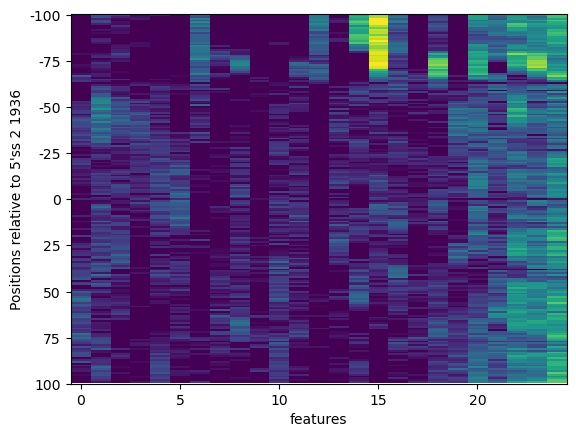

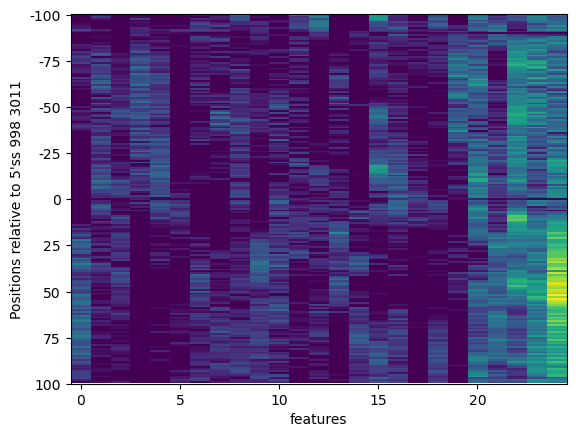

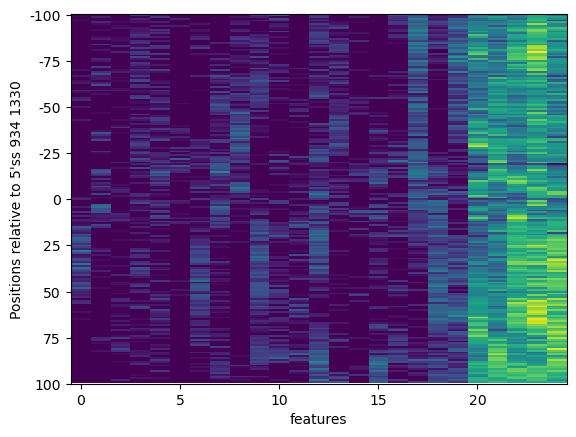

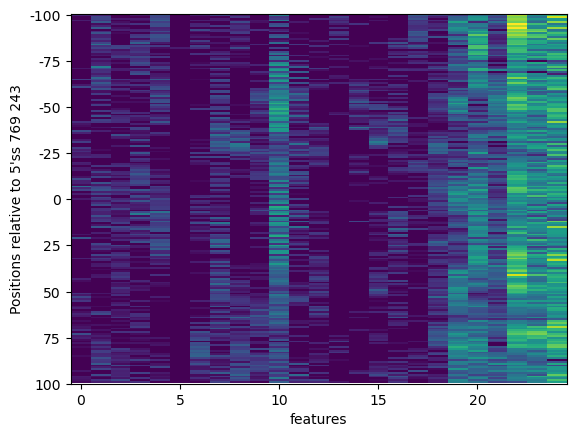

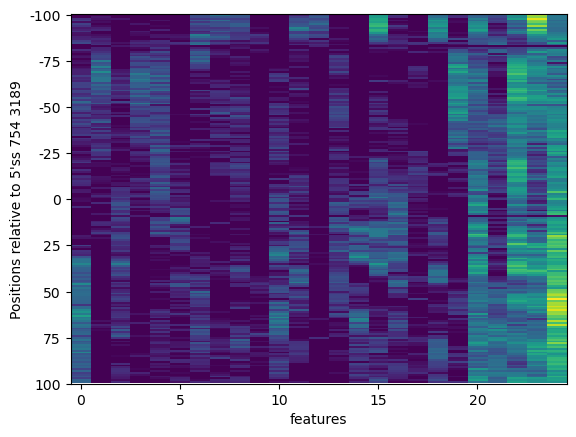

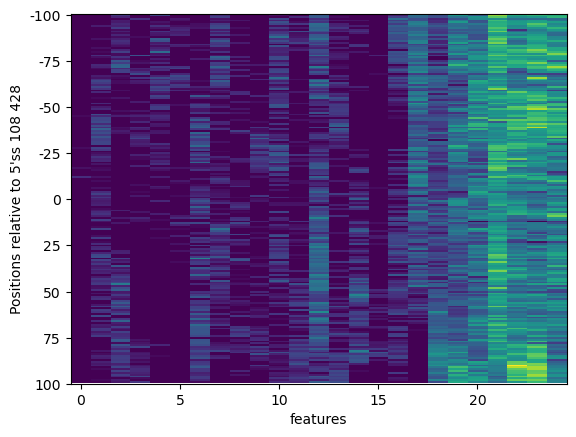

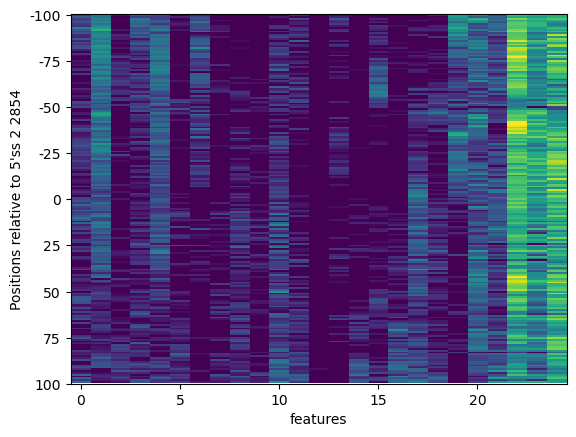

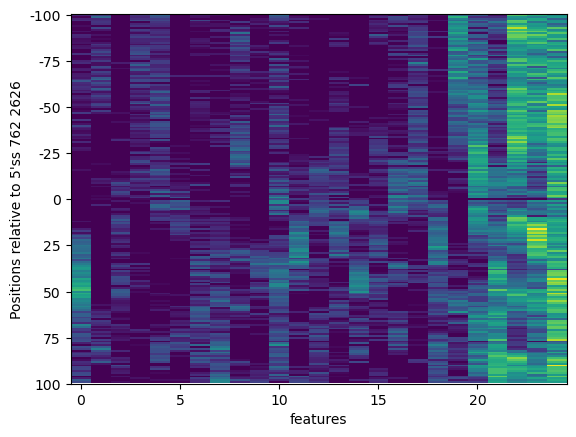

In [6]:
jump_01_activations = feature_gazing('Predictions_SpliceAI_WG_Add_14_MB_3_out_1024_jumprelu_16_0.0003_0.1_50049.1')

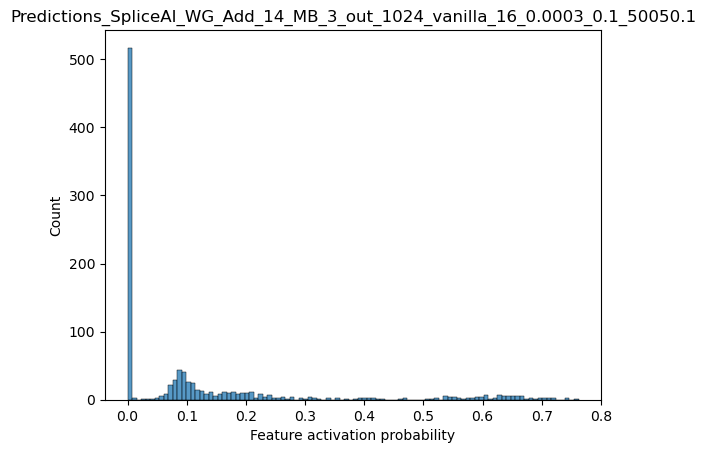

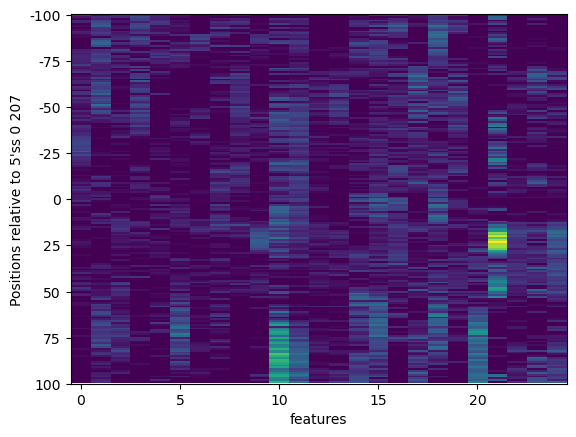

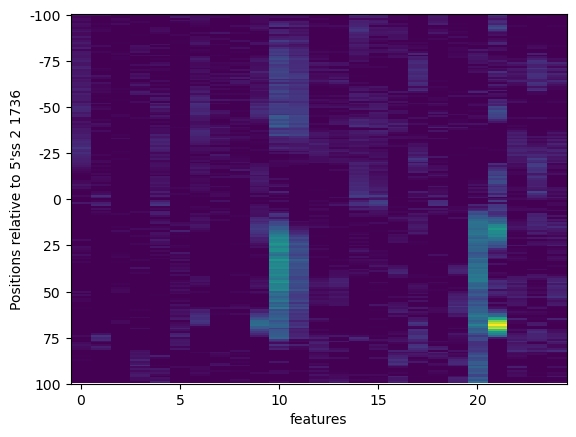

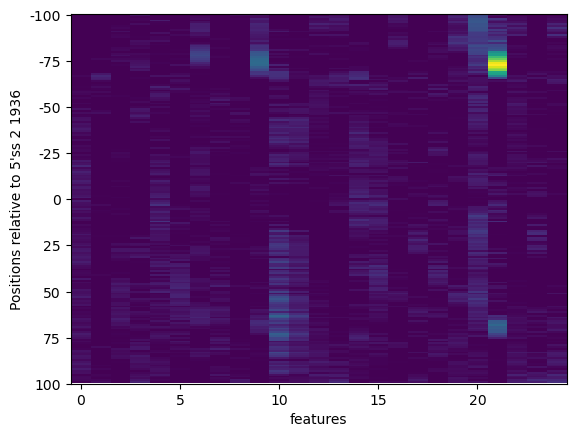

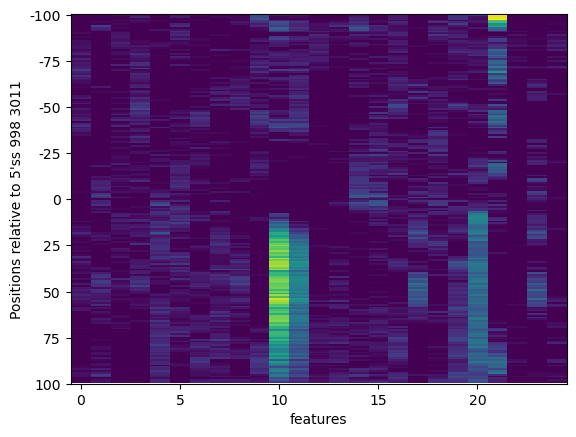

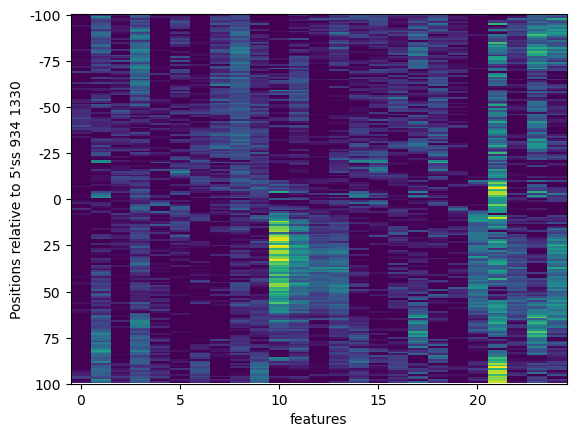

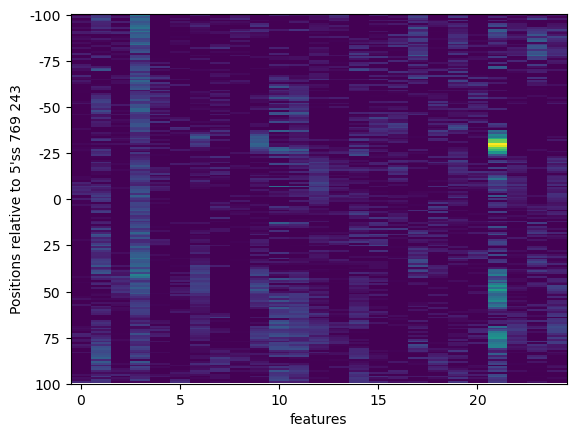

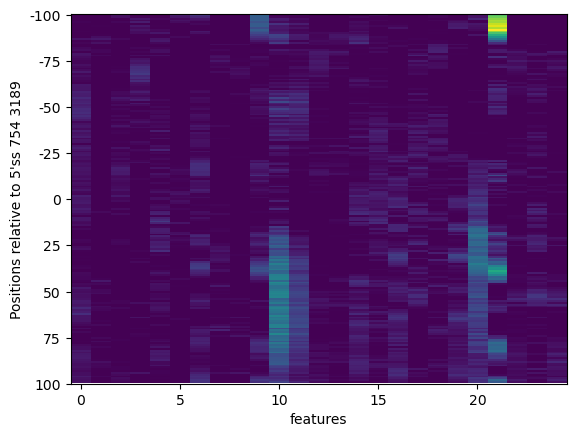

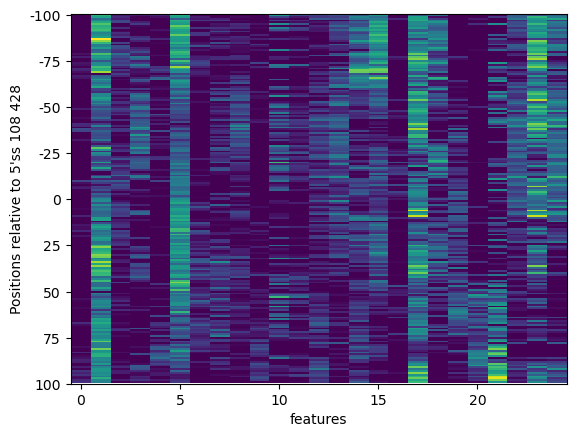

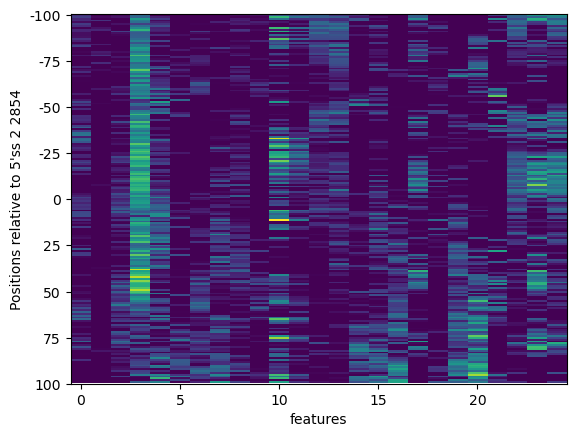

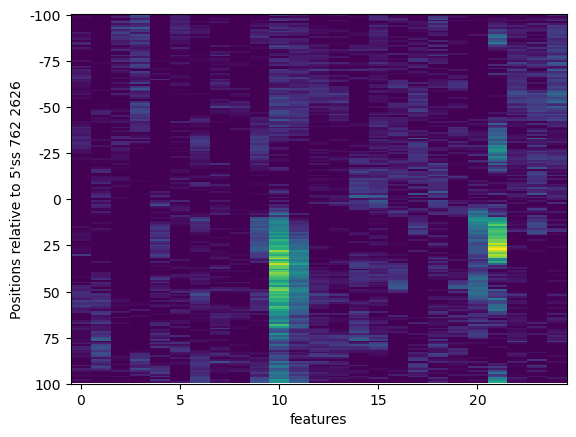

In [7]:
vanil_01_activations = feature_gazing('Predictions_SpliceAI_WG_Add_14_MB_3_out_1024_vanilla_16_0.0003_0.1_50050.1')

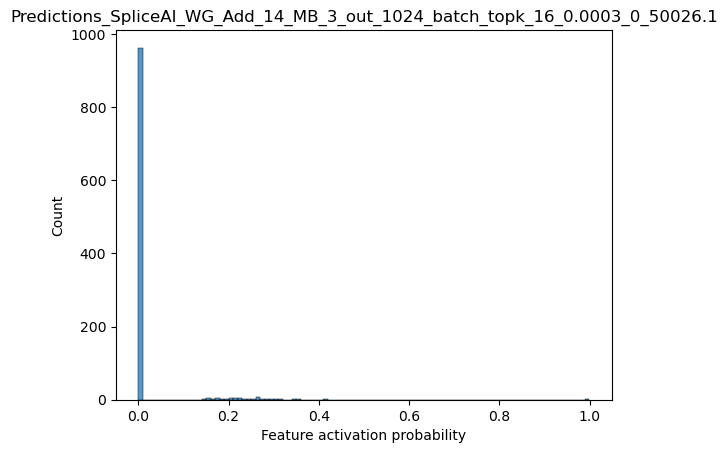

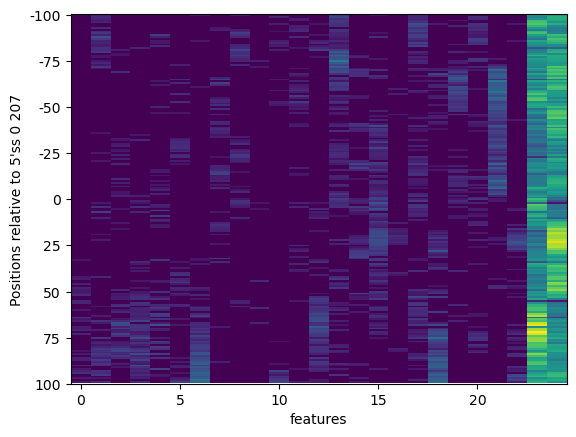

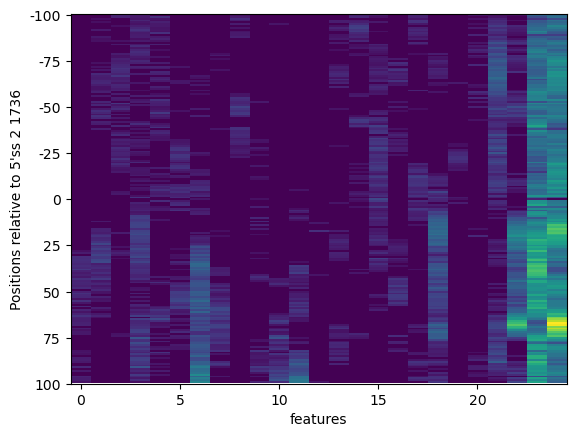

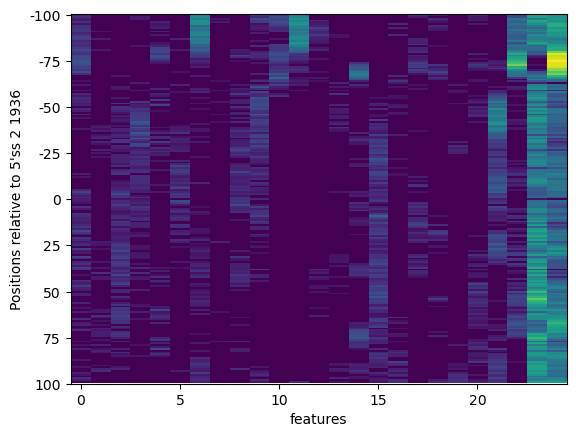

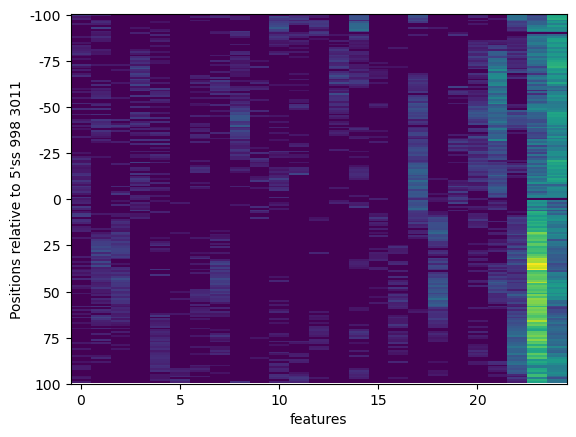

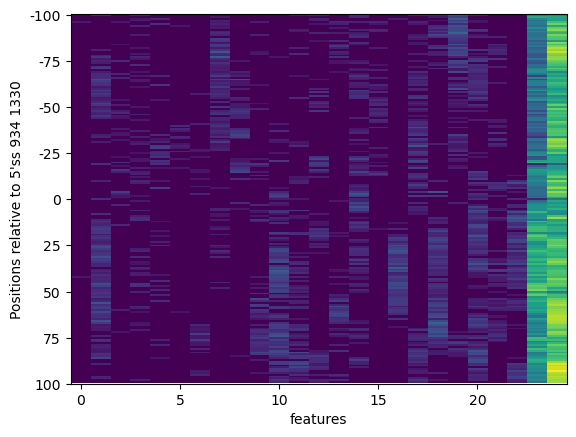

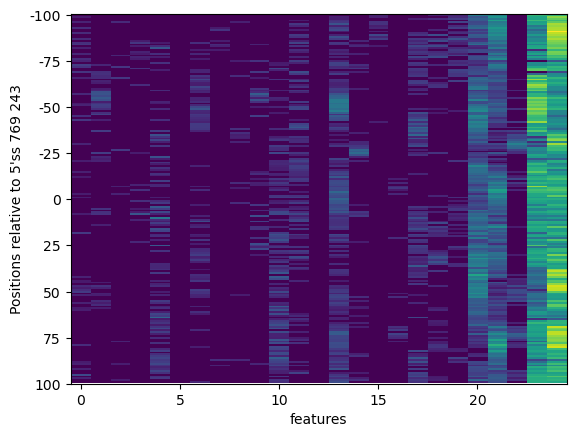

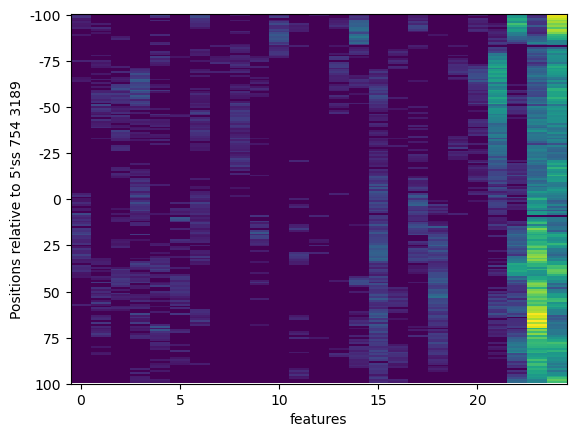

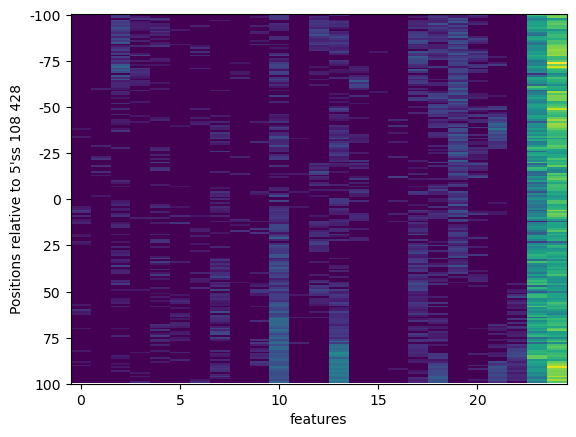

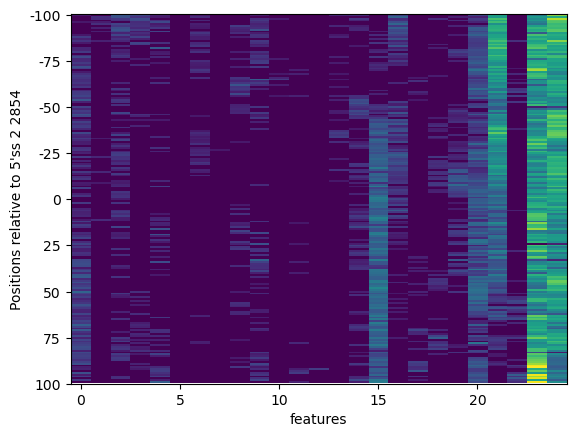

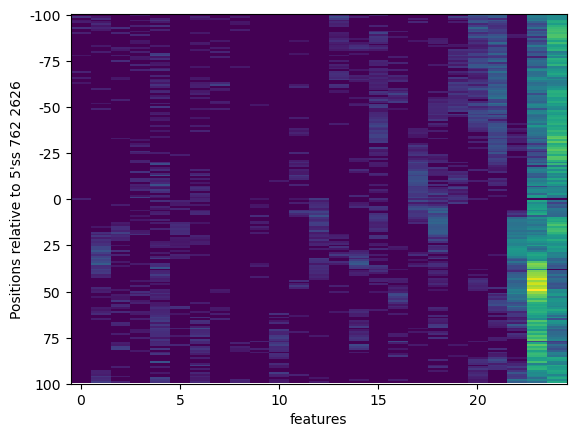

In [8]:
batchtopk16_activations = feature_gazing('Predictions_SpliceAI_WG_Add_14_MB_3_out_1024_batch_topk_16_0.0003_0_50026.1')

In [3]:
path = '/grid/kinney/home/desmara/MPSA_pred/SOTA_models/head_interpretation/SAE_Hackathon/data/whole_genome/test_chunks_1k_annotations.h5'
with h5py.File(path,'r') as f:
    annotations = f['annotations'][:]
annotations.shape

(1000, 5000, 36)

In [11]:
catted = np.concat([topk16_activations,annotations], axis=-1)

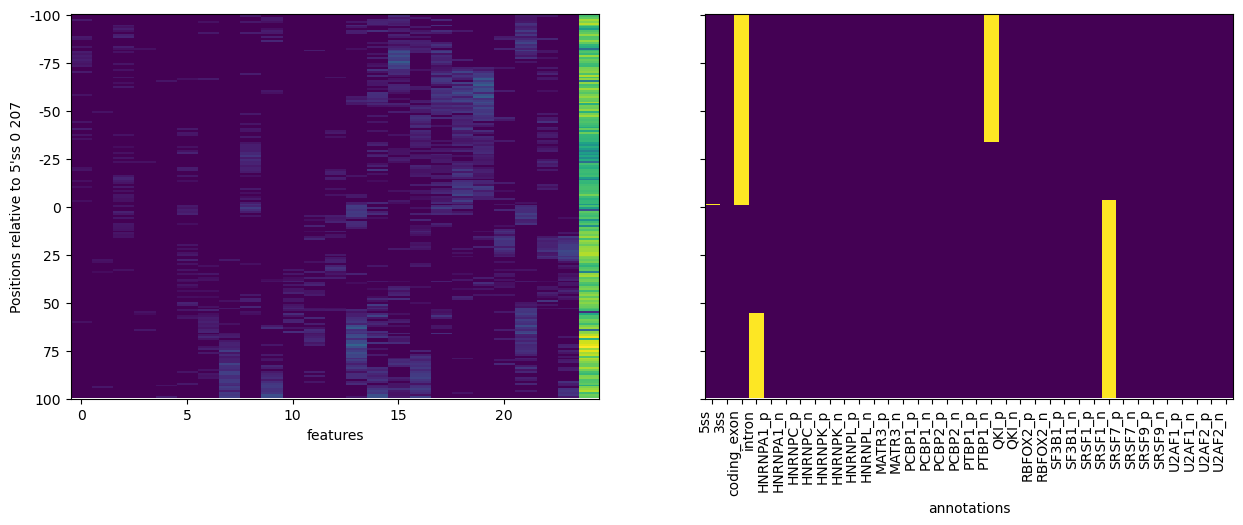

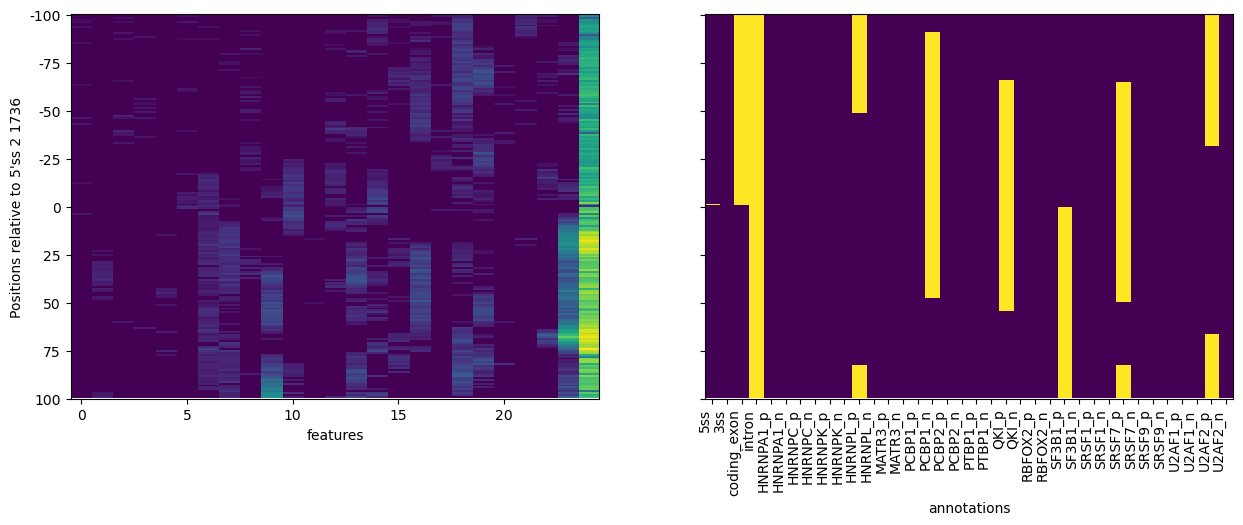

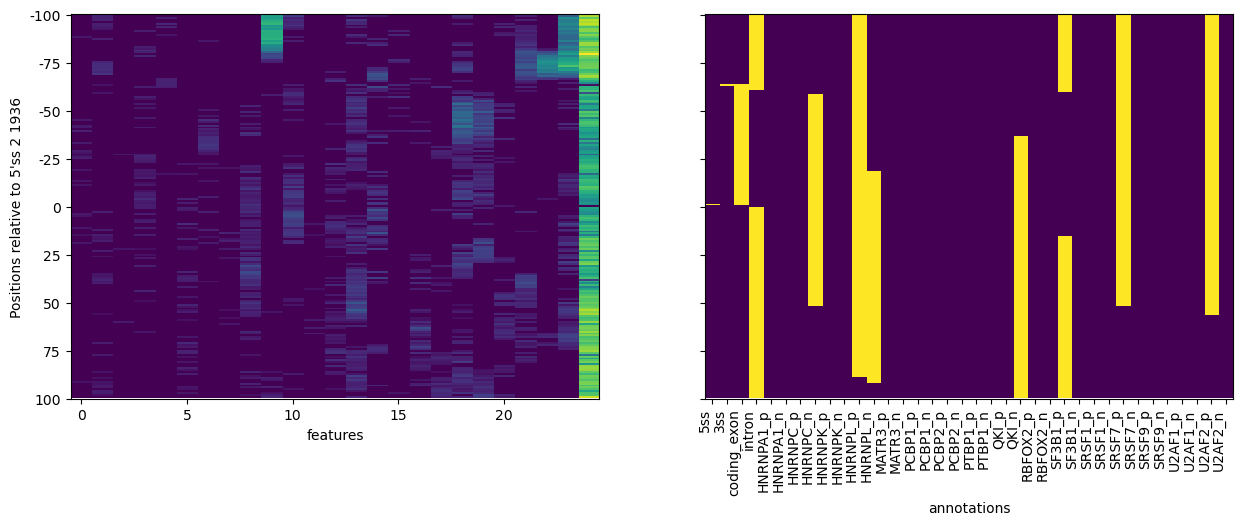

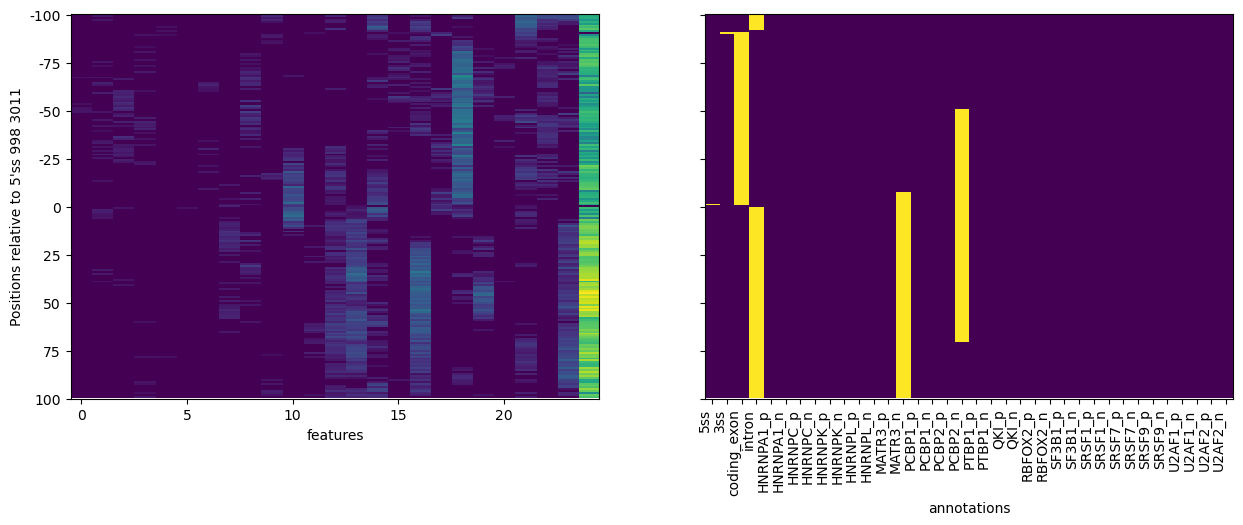

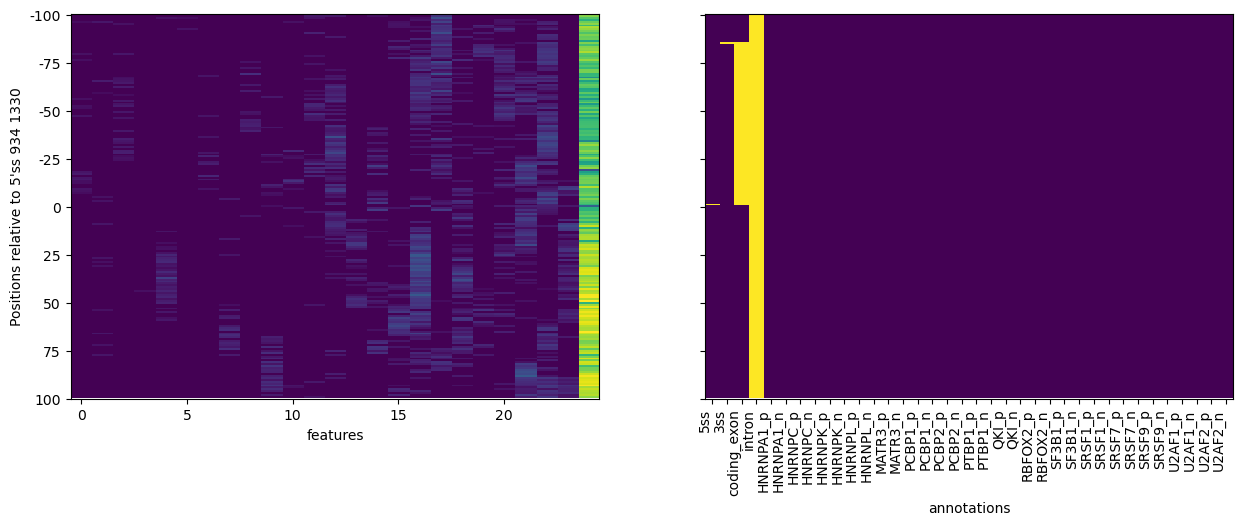

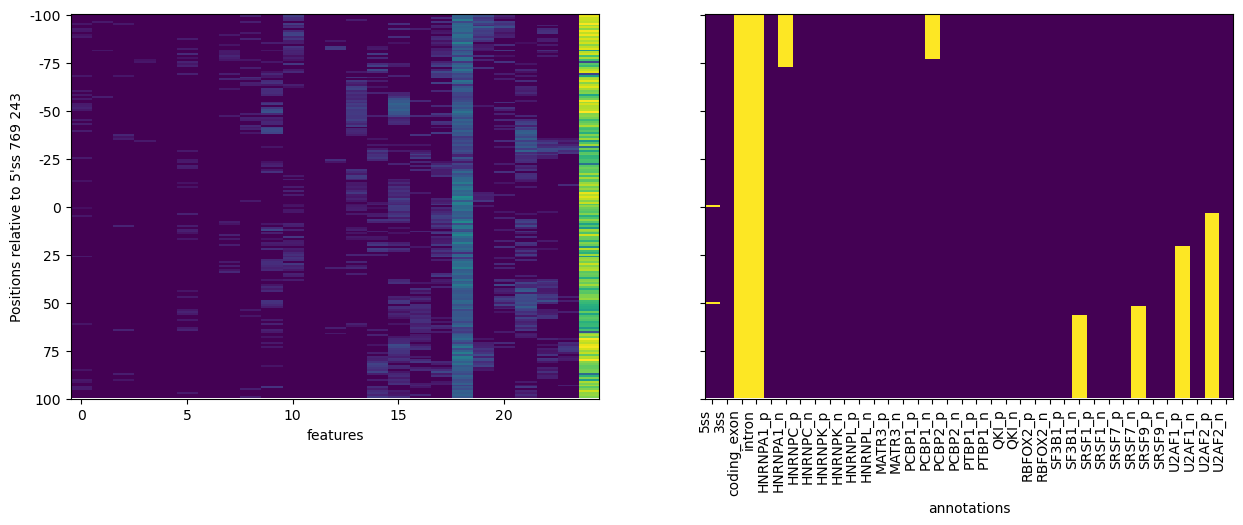

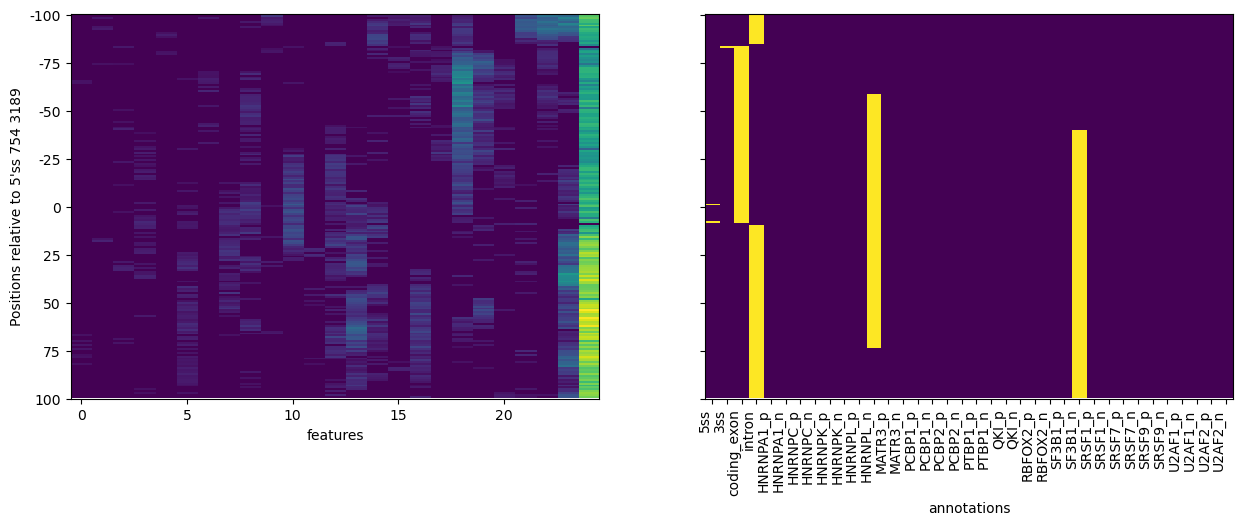

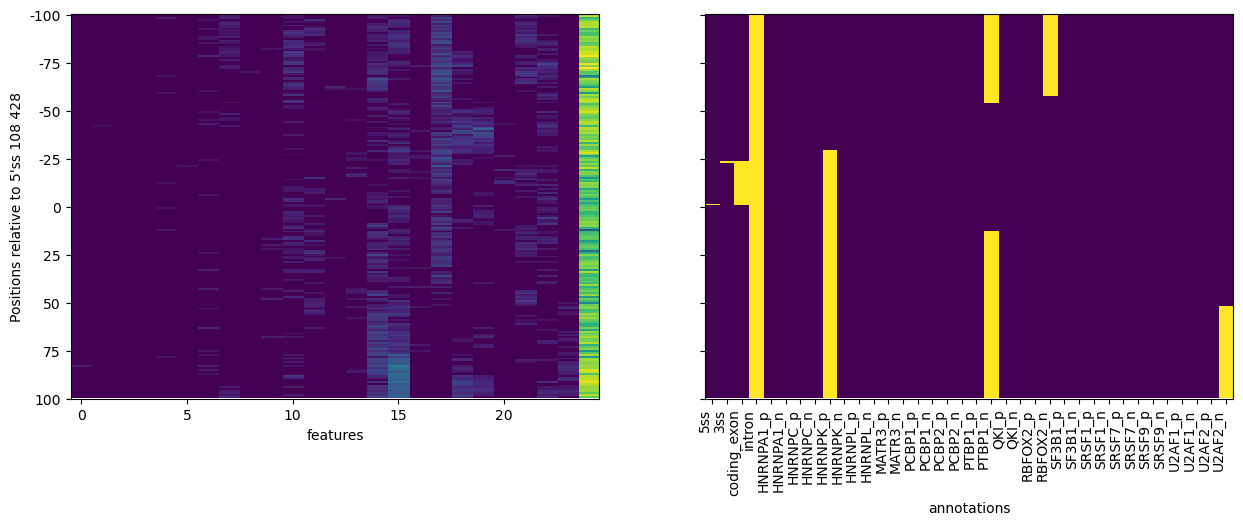

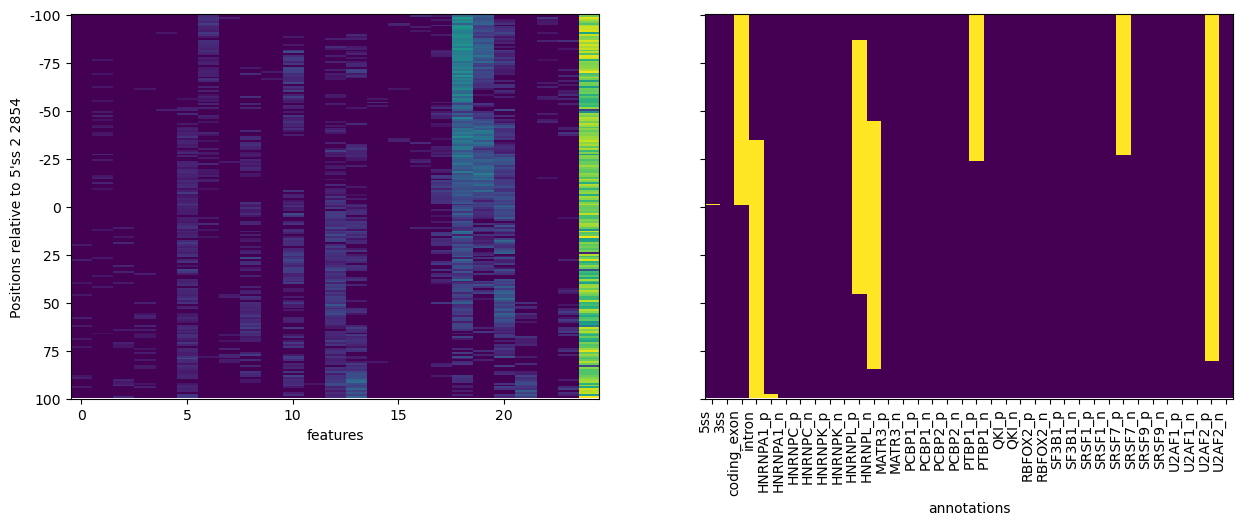

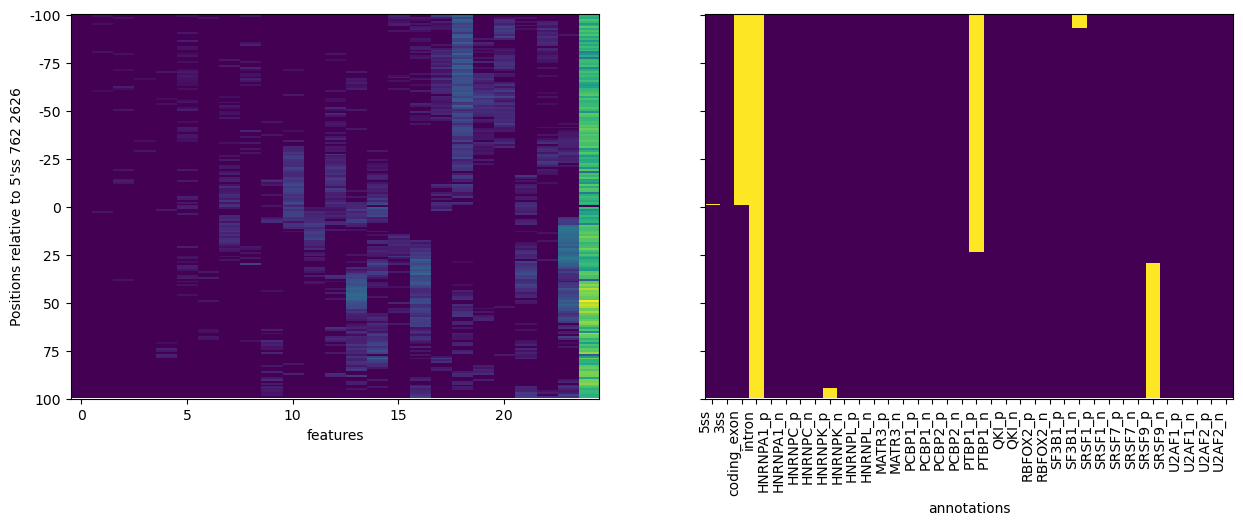

In [20]:
def plot_some_splice_site(activations, chunks, targets):
    
    for chunk, target in zip(chunks, targets):
        fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,5))
        plt.sca(axes[0])
        plt.imshow(activations[chunk,target-100:target+100,-25-36:-36], aspect='auto', interpolation='none')
        plt.sca(axes[1])
        plt.imshow(activations[chunk,target-100:target+100,-36:], aspect='auto', interpolation='none')
        yticks = axes[0].get_yticks()

        # Create new labels by subtracting 100
        new_labels = [int(y - 100) for y in yticks[1:]]

        # Set the new labels while keeping the same tick positions
        axes[0].set_yticks(yticks[1:])
        axes[0].set_yticklabels(new_labels)
        plt.sca(axes[0])
        plt.xlabel('features')
        plt.ylabel(f"Positions relative to 5'ss {chunk} {target}")
        
        plt.sca(axes[1])
        feature_files = ['5ss', '3ss', 'coding_exon', 'intron',
                 'HNRNPA1_p','HNRNPA1_n',
                 'HNRNPC_p',  'HNRNPC_n',
                 'HNRNPK_p', 'HNRNPK_n',
                 'HNRNPL_p', 'HNRNPL_n',
                 'MATR3_p','MATR3_n',
                 'PCBP1_p', 'PCBP1_n',
                 'PCBP2_p', 'PCBP2_n',
                 'PTBP1_p', 'PTBP1_n',
                 'QKI_p', 'QKI_n',
                 'RBFOX2_p','RBFOX2_n',
                 'SF3B1_p', 'SF3B1_n',
                 'SRSF1_p', 'SRSF1_n',
                 'SRSF7_p', 'SRSF7_n',
                 'SRSF9_p','SRSF9_n',
                 'U2AF1_p', 'U2AF1_n',
                 'U2AF2_p', 'U2AF2_n']
        plt.xticks(range(36),feature_files,rotation=90,ha='right')
        plt.xlabel('annotations')
        plt.show()
        
chunks = [0,2,2,998,934,769,754,108,2,762]
targets = [207,1736,1936,3011,1330,243,3189,428,2854,2626]
plot_some_splice_site(catted,chunks,targets)

In [42]:
live_features = topk16_activations[:500].reshape(-1,1024)
live_features = live_features[:,live_features.sum(axis=0)>0]
live_features.shape

(2500000, 494)

In [43]:
cor_mat = np.corrcoef(live_features.T,y=annotations[:500].reshape(-1,36).T)
cor_mat

array([[ 1.00000000e+00, -4.00000160e-07, -4.00000160e-07, ...,
        -4.22632389e-05, -5.30568912e-05, -4.24290755e-05],
       [-4.00000160e-07,  1.00000000e+00, -4.00000160e-07, ...,
        -4.22632389e-05, -5.30568912e-05, -4.24290755e-05],
       [-4.00000160e-07, -4.00000160e-07,  1.00000000e+00, ...,
        -4.22632389e-05, -5.30568912e-05, -4.24290755e-05],
       ...,
       [-4.22632389e-05, -4.22632389e-05, -4.22632389e-05, ...,
         1.00000000e+00,  1.34487276e-02,  7.51920628e-02],
       [-5.30568912e-05, -5.30568912e-05, -5.30568912e-05, ...,
         1.34487276e-02,  1.00000000e+00,  6.10206160e-02],
       [-4.24290755e-05, -4.24290755e-05, -4.24290755e-05, ...,
         7.51920628e-02,  6.10206160e-02,  1.00000000e+00]],
      shape=(530, 530))

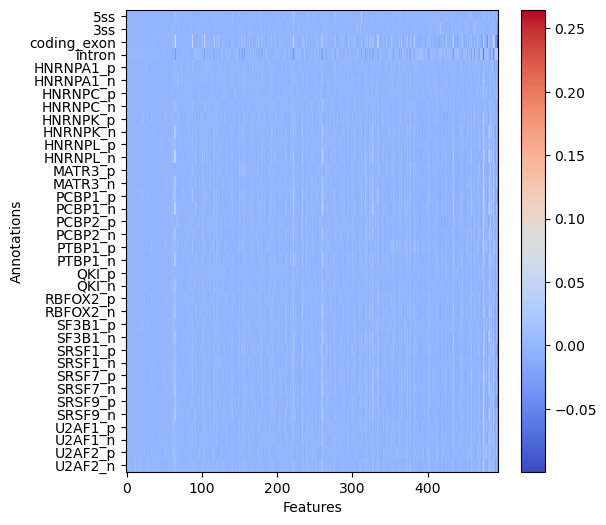

In [44]:
fig = plt.figure(figsize=(6,6))
plt.imshow(cor_mat[-36:,:-36], interpolation='none',aspect='auto', cmap='coolwarm')
plt.ylabel('Annotations')
plt.xlabel('Features')
feature_files = ['5ss', '3ss', 'coding_exon', 'intron',
                 'HNRNPA1_p','HNRNPA1_n',
                 'HNRNPC_p',  'HNRNPC_n',
                 'HNRNPK_p', 'HNRNPK_n',
                 'HNRNPL_p', 'HNRNPL_n',
                 'MATR3_p','MATR3_n',
                 'PCBP1_p', 'PCBP1_n',
                 'PCBP2_p', 'PCBP2_n',
                 'PTBP1_p', 'PTBP1_n',
                 'QKI_p', 'QKI_n',
                 'RBFOX2_p','RBFOX2_n',
                 'SF3B1_p', 'SF3B1_n',
                 'SRSF1_p', 'SRSF1_n',
                 'SRSF7_p', 'SRSF7_n',
                 'SRSF9_p','SRSF9_n',
                 'U2AF1_p', 'U2AF1_n',
                 'U2AF2_p', 'U2AF2_n']
plt.yticks(range(36),feature_files)

plt.colorbar()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x15550d0da5c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

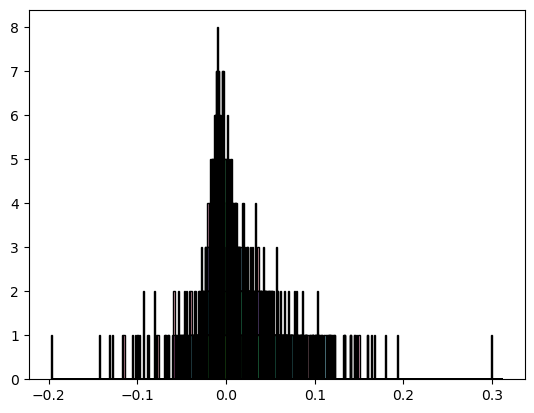

In [35]:
sns.histplot(cor_mat[-36:,:-36])